In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
# Кол-во значений
n_samples = 500

# Генерируем признаки
# Выброс CO2 (грамм/км)
co2 = np.random.choice(np.arange(50,250), n_samples)
# Масса (кг)
m = np.random.choice(np.arange(1500,2200), n_samples)
# Пробег (км), от 0 до 230000
mileage = np.random.choice(230000, n_samples)
# Максимальная скорость
speed = np.random.choice(np.arange(180,280), n_samples)
# Возраст водителя
age_owner = np.random.choice(np.arange(18,50), n_samples)

# Итоговый рейтинг скорости автомобиля
# Зависит от скорости и пробега: ПУСТЬ БУДЕТ 1 пункт на 10 км/ч и за каждые 25000 км пробега
speed_rating = (speed // 10) - (1 + mileage // 25000)

data = pd.DataFrame({'age_owner': age_owner, 'co2': co2, 'm': m, 'mileage': mileage, 'speed': speed, 'speed_rating': speed_rating})
data.head(20)
#data.loc[data['age_owner'].idxmax()]

,age_owner,co2,m,mileage,speed,speed_rating
0,39,247,1519,62847,271,24
1,30,96,1831,212020,251,16
2,27,208,1811,93834,186,14
3,29,62,2046,155345,250,18
4,30,201,1759,177945,206,12
5,45,180,1542,216340,260,17
6,40,211,1609,176242,212,13
7,32,82,2088,113359,202,15
8,23,87,2133,149409,276,21
9,39,181,1989,78156,274,23


In [3]:
from sklearn.metrics import mean_absolute_error

# Строим модель линейной регрессии (по всем признакам)
X = data[['age_owner', 'co2', 'm', 'mileage', 'speed']]
y = data['speed_rating']

model = LinearRegression()
model.fit(X, y)
print('Ki: {}'.format(model.coef_))
print('B: {}'.format(model.intercept_))

# Предсказываем значение по модели. Сравниваем с реальностью
pred_values = model.predict(data[['age_owner', 'co2', 'm', 'mileage', 'speed']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Ki: [ 3.26067142e-03 -4.90377053e-04  2.44724174e-05 -3.95981110e-05
  9.87734018e-02]
B: -0.8032104804218143
Error: 0.3429975463394756


In [4]:
# Рейтинг скорости зависит от непосредственно скоросити и пробега автомобиля
X = data[['speed', 'mileage']]
y = data['speed_rating']

# Переобучим модель (по скорости и пробегу)
model.fit(X, y)
print('Ki: {}'.format(model.coef_))
print('B: {}'.format(model.intercept_))

# Точность модели почти не изменилась
pred_values = model.predict(data[['speed', 'mileage']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Ki: [ 9.87914343e-02 -3.96246407e-05]
B: -0.7211477942228264
Error: 0.34314041225848496


In [5]:
# Создаем новый признак
# По придуманной формуле speed_rating = (speed // 10) - (1 + mileage // 25000)
data['speed_mileage'] = (data['speed'] // 10) - (1 + data['mileage'] // 25000)
data.head(5)

,age_owner,co2,m,mileage,speed,speed_rating,speed_mileage
0,39,247,1519,62847,271,24,24
1,30,96,1831,212020,251,16,16
2,27,208,1811,93834,186,14,14
3,29,62,2046,155345,250,18,18
4,30,201,1759,177945,206,12,12


In [6]:
# Построим модель по новому признаку
X = data[['speed_mileage']]
y = data['speed_rating']

# Переобучаем
model.fit(X, y)
print('Ki: {}'.format(model.coef_))
print('B: {}'.format(model.intercept_))

# Видно, что ошибки почти нет
pred_values = model.predict(data[['speed_mileage']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Ki: [1.]
B: 3.552713678800501e-15
Error: 4.050093593832571e-16


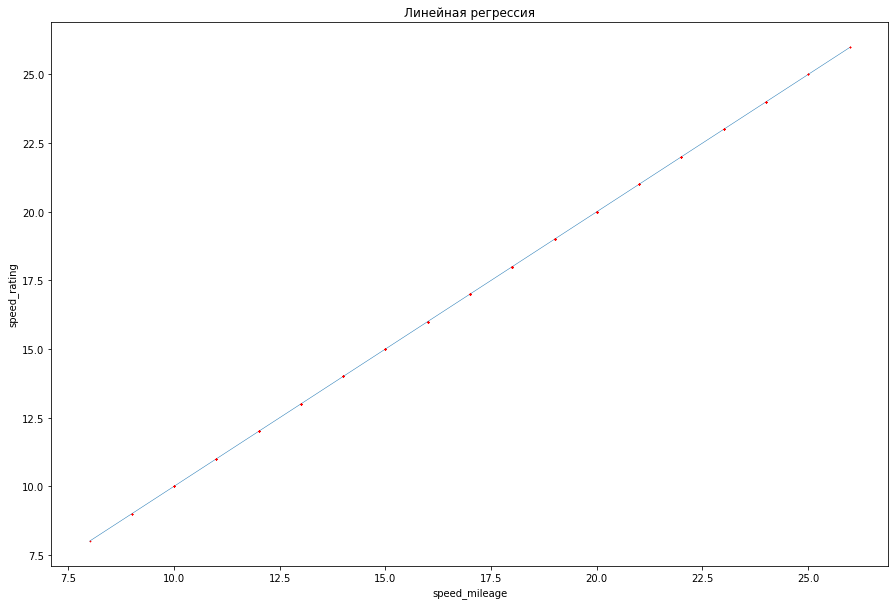

In [7]:
# Посторим график
plt.figure(figsize=(15,10))

plt.xlabel('speed_mileage')
plt.ylabel('speed_rating')
plt.title('Линейная регрессия')

# Линия регресии для модели
x = np.linspace(min(data['speed_mileage']), max(data['speed_mileage']), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y, linewidth = 0.5)

# Реальные данные
plt.plot(data['speed_mileage'], data['speed_rating'], 'r.', markersize = 1)

# Тонкие линии и маленькие точки: чтобы разглядеть небольшие расхождения
plt.show()